# 예측 모델
 > ## 1. MLP(hidden layer 1개, tensorflow)
 ## 2. MLP(hidden layer 2개, tensorflow)
 ## 3. MLP, DNN(keras)
 ## 4. Randomforest
 ## 5. XGBoost
 ## 6. LightGBM
 ## 7. Lasso
 ## 8. ElasticNet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/airi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

In [3]:
y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
display(x_train.head())
display(x_test.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.784689,1.214179,-0.112313,0.251255,1.129973,-0.251374,-0.547956,-0.423910,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0
1,0.403194,-0.859795,-0.112313,0.251255,-0.833091,3.880135,-0.132294,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
2,-0.569273,1.220996,-0.112313,0.251255,1.129973,-0.251374,0.167200,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.437869,1.155241,-0.112313,0.251255,1.129973,-0.251374,0.329240,2.903308,0.751112,-1.027091,...,0,0,0,0,1,0,1,1,0,0
4,0.098904,1.318031,-0.112313,1.273273,1.129973,-0.251374,0.256527,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.648517,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,-0.166720,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
1,0.566804,-0.859795,-0.112313,0.251255,-0.833091,-0.251374,0.118809,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
2,-0.543248,1.119259,-0.112313,0.251255,-0.833091,-0.251374,-0.603727,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.549736,1.103498,-0.112313,0.251255,-0.833091,-0.251374,-0.041299,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
4,0.447860,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,0.830074,-0.42391,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0


- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

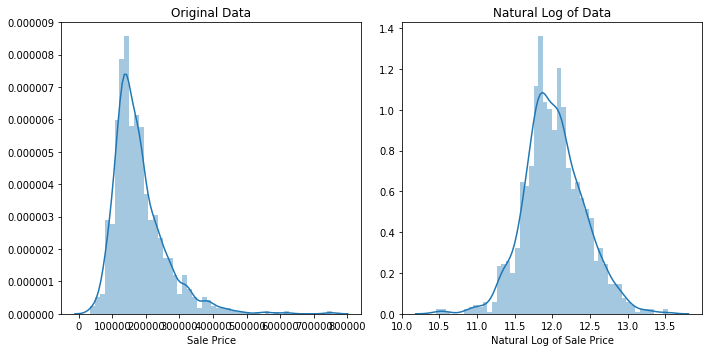

In [5]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### score 도출해주는 함수 선언

In [6]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

지금까지가 데이터 로딩이다. 추후 1번부터 6번까지 모델 정의 및 label 예측이다.<br>
1, 4, 5, 6은 직접적으로 예측에 사용한다. 2, 3은 모델은 정의했지만 생각대로 예측이 정확하게 되지 않아 배제하였다.

- - -
 # 1. MLP(hidden layer 1개, tensorflow)

In [7]:
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### hyperparameter init

In [8]:
'''
    num_unit1 : hidden layer의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
keepout = 0.5
step = 10000
learning_rate = 0.003
batch_size = 30

### 학습 모델(hidden layer 1개)

In [9]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(0., shape = [num_unit1]))

W0 = tf.Variable(tf.truncated_normal([num_unit1, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(0., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden1 layer
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
# hidden1 = (tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden1_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
lr = tf.placeholder(tf.float32)
train_step = tf.train.AdamOptimizer(lr).minimize(cost)

### 학습 / 검증(split data로 train)

In [10]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train_np,
                                                    y_train_log,
                                                    test_size=0.33,
                                                    random_state=7)
# mini batch를 일단 없애고 진행했다.
batch_size = x_train1.shape[0]

print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])
y_train1 = y_train1.reshape([y_train1.shape[0], 1])
y_train2 = y_train2.reshape([y_train2.shape[0], 1])

j=0
for _ in range(step):
    j += 1

    batch_count = int(math.ceil(x_train1.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs1, batch_ys1 = x_train1[batch_size * i : batch_size*(i+1)], y_train1[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs1, y_: batch_ys1, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if j % 100 == 0:
            print('step : {}, batch : {}'.format(j, i*batch_size), end='\t\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train1, y_: y_train1, keep_prob:keepout, lr : learning_rate}), 
                   'valid_loss :', sess.run(cost, feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate}))
train_writer.close()


Training

step : 100, batch : 0		loss : 2.3094864 valid_loss : 2.3069572
step : 200, batch : 0		loss : 1.8132521 valid_loss : 1.8226912
step : 300, batch : 0		loss : 1.68598 valid_loss : 1.6563004
step : 400, batch : 0		loss : 1.3591807 valid_loss : 1.6102179
step : 500, batch : 0		loss : 1.4847511 valid_loss : 1.4061326
step : 600, batch : 0		loss : 1.3803256 valid_loss : 1.3567102
step : 700, batch : 0		loss : 1.3855573 valid_loss : 1.3261578
step : 800, batch : 0		loss : 1.3899388 valid_loss : 1.4312572
step : 900, batch : 0		loss : 1.3518282 valid_loss : 1.344911
step : 1000, batch : 0		loss : 1.2529583 valid_loss : 1.473693
step : 1100, batch : 0		loss : 1.3417548 valid_loss : 1.3280003
step : 1200, batch : 0		loss : 1.2838254 valid_loss : 1.1984333
step : 1300, batch : 0		loss : 1.2117302 valid_loss : 1.3389883
step : 1400, batch : 0		loss : 1.2818274 valid_loss : 1.1581743
step : 1500, batch : 0		loss : 1.1210091 valid_loss : 1.0331413
step : 1600, batch : 0		loss : 1.1449512 va

### 검증 데이터 plotting

24197.3390163951


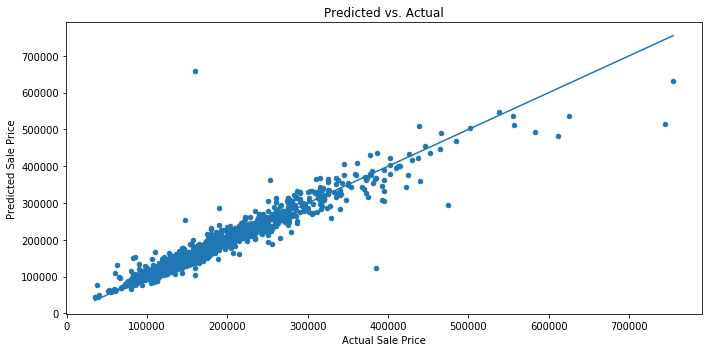

In [11]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

sess.close()
print(rmsle(y_train,pred_train))

### train 전체 데이터로 학습, test로 predict

In [12]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

###
batch_size = x_train.shape[0]

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

j=0

for _ in range(step):
    j += 1
    
    batch_count = int(math.ceil(x_train.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs, batch_ys = x_train[batch_size * i : batch_size*(i+1)], y_train_log[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs, y_: batch_ys, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1:  x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if j % 100 == 0:
            print('step : {}, batch : {}'.format(j, i), end='\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate}))


print ("Testing model")
# Test trained model
y_test = pd.read_csv('./data/submission.csv', engine='python')
hidden1_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden1_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

train_writer.close()
sess.close()

Training

step : 100, batch : 0	loss : 2.115805
step : 200, batch : 0	loss : 1.7152756
step : 300, batch : 0	loss : 1.6981435
step : 400, batch : 0	loss : 1.4292552
step : 500, batch : 0	loss : 1.4561288
step : 600, batch : 0	loss : 1.3232436
step : 700, batch : 0	loss : 1.4134349
step : 800, batch : 0	loss : 1.3900093
step : 900, batch : 0	loss : 1.2803252
step : 1000, batch : 0	loss : 1.3445897
step : 1100, batch : 0	loss : 1.2256306
step : 1200, batch : 0	loss : 1.2281529
step : 1300, batch : 0	loss : 1.1443923
step : 1400, batch : 0	loss : 1.1255634
step : 1500, batch : 0	loss : 1.3441223
step : 1600, batch : 0	loss : 1.1543053
step : 1700, batch : 0	loss : 1.1261021
step : 1800, batch : 0	loss : 1.1593279
step : 1900, batch : 0	loss : 1.0271808
step : 2000, batch : 0	loss : 1.0342698
step : 2100, batch : 0	loss : 1.0729316
step : 2200, batch : 0	loss : 0.9661391
step : 2300, batch : 0	loss : 1.0817487
step : 2400, batch : 0	loss : 1.0595944
step : 2500, batch : 0	loss : 1.0082834


### tensorboard
 - loss
![](./img/1.png)
 - graph
![](./img/2.png)

- - -
 # 2. MLP(hidden layer 2개, tensorflow)

In [ ]:
import tensorflow as tf

In [ ]:
'''
    num_unit1 : hidden layer 1의 뉴런 개수
    num_unit2 : hidden layer 2의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
num_unit2 = 75
keepout = 0.5
step = 10000
learning_rate = 0.003

### 학습 모델(hidden layer 2개)

In [ ]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(1., shape = [num_unit1]))

W2 = tf.Variable(tf.truncated_normal([num_unit1, num_unit2],
                                          stddev=0.1))
b2 = tf.Variable(tf.constant(1., shape = [num_unit2]))

W0 = tf.Variable(tf.truncated_normal([num_unit2, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(1., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden layer 1
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Hidden2 layer
hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, W2) + b2)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden2_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### 학습

In [ ]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

In [ ]:
# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

In [ ]:
j=0

In [ ]:
for _ in range(step):
    j += 1
    summary, _ = sess.run([merged, train_step],
                        feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout})
    train_writer.add_summary(summary, j)
    if j % 1000 == 0 :
        print('step :', j, end='\t')
        print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout}))

In [ ]:
train_writer.close()

### 검증

In [ ]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

print(rmsle(y_train,pred_train))

### test(predict)

In [ ]:
print ("Testing model")
# Test trained model
hidden2_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden2_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

- - -
# 3. keras
### MLP or DNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.5)
    model.add(Dense(130, activation='relu'))
    tf.keras.layers.Dropout(0.5)
#     model.add(Dense(35, activation='relu'))
#     tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    adam = optimizers.Adam(lr=0.00003)
    model.compile(optimizer =adam, loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()
model.summary()

### train, valid data split / 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=2000, batch_size = 256)

In [ ]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.ylim([0,0.001])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1,2,2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="test")
plt.ylim([0,0.08])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(np.exp(y_pred),np.exp(y_test)))

### train 전체 데이터로 학습(fit), test로 predict

In [ ]:
x_train.shape

In [ ]:
hist = model.fit(x_train, y_train_log, epochs=5000, batch_size = 200)

In [ ]:
keras_pred = np.exp(model.predict(x_test))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = keras_pred
print(submission)

submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [ ]:
data_train.head()

- - -
# 4. Randomforest

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

### train data 학습 후 valid data 검증

38077.17183368758


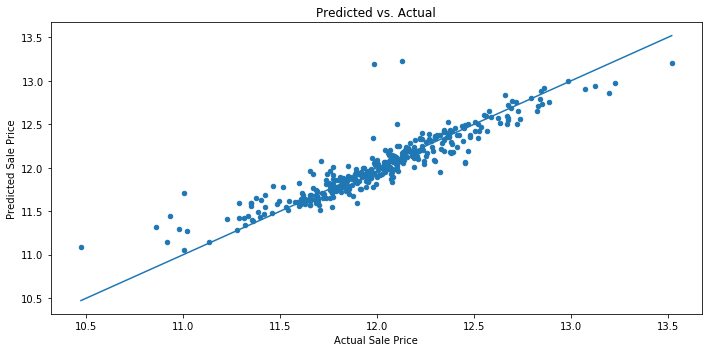

In [15]:
clf = RandomForestRegressor(n_estimators=5000, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [16]:
clf.fit(x_train, y_train_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### test data로 prediction

In [17]:
y_pred = clf.predict(x_test)
randfor_pred = np.exp(y_pred)
randfor_pred

array([126264.42118287, 152942.283433  , 174394.72605587, ...,
       152984.48347626, 115036.9499959 , 235681.0389118 ])

- - -
# 5. xgboost

### 모델 정의 및 검증

24083.054679952045


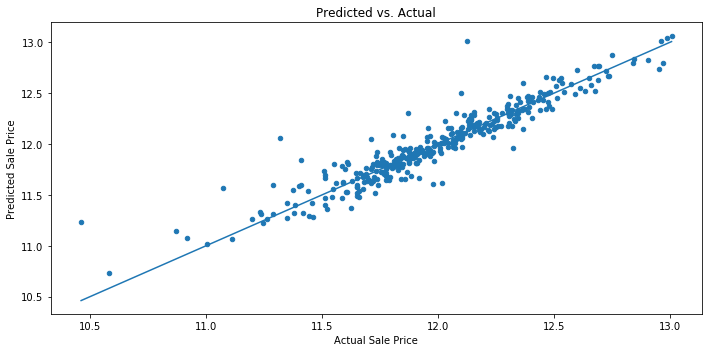

In [18]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [19]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.3, gamma=0.05, 
                             learning_rate=0.005, max_depth=4, 
                             min_child_weight=2.0, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=1.,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(x_train, y_train_log)
y_pred = model_xgb.predict(x_test)
xgb_pred = np.exp(y_pred)
print(xgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': xgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

[124170.41 161630.44 183607.55 ... 162480.14 117374.42 226059.42]


- - -
# 6. LightGBM

### 모델 정의 및 검증

25749.757771863777


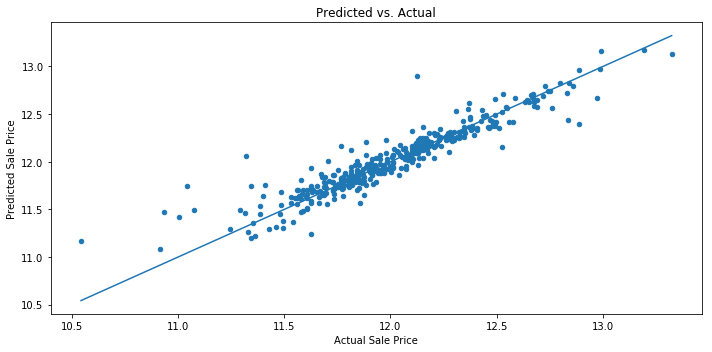

In [20]:
import lightgbm as lgb

y_train_log = y_train_log.reshape(y_train_log.shape[0])

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train1, y_train1)
y_pred = model_lgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

In [21]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=12000,
                              max_bin = 64, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=16 , bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train_log)
y_pred = model_lgb.predict(x_test)
lgb_pred = np.exp(y_pred)
print(lgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': lgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/lgb_all_normalize_skewed.csv', index=False)

[127802.83550706 163502.79746301 184889.54519198 ... 177286.51881279
 113725.06059832 207193.54008689]


- - -
# 7. Lasso

In [22]:
from sklearn.linear_model import Lasso

las = Lasso(alpha =0.0005, random_state=1)
las.fit(x_train, y_train_log)
las_pred = np.exp(las.predict(x_test))

- - -
# 8. ElasticNet

In [23]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.001, l1_ratio=0.5, normalize=False)

model_EN.fit(x_train,y_train_log)
EN_pred = np.exp(model_EN.predict(x_test))

- - -
## K-fold cross validation

In [24]:
from sklearn.cross_validation import cross_val_score

# randomforest, xgb, lgbm, lasso, ElasticNet 의 검증
model_list = [model_xgb, model_lgb, clf, las ,model_EN]

j = 0
for i in model_list:
    j+=1
    print(j, "  ", str(i).split('(')[0])
    scores = cross_val_score(estimator=i, 
                             X=x_train, 
                             y=y_train_log, 
                             cv=5,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f\n' % (np.mean(scores), np.std(scores)))
    

1    XGBRegressor
CV accuracy scores: [0.92825926 0.90310659 0.9038021  0.91775183 0.89750618]
CV accuracy: 0.910 +/- 0.011

2    LGBMRegressor
CV accuracy scores: [0.9147612  0.89991965 0.88941538 0.90872997 0.88498538]
CV accuracy: 0.900 +/- 0.011

3    RandomForestRegressor
CV accuracy scores: [0.87329046 0.8680975  0.87328697 0.88663943 0.85319449]
CV accuracy: 0.871 +/- 0.011

4    Lasso
CV accuracy scores: [0.92883621 0.90172464 0.90610201 0.92105522 0.85862363]
CV accuracy: 0.903 +/- 0.024

5    ElasticNet
CV accuracy scores: [0.92720743 0.90276311 0.90818771 0.91947649 0.85870489]
CV accuracy: 0.903 +/- 0.024



- - -
# ensemble 적용, 예측
 실질적으로 2, 3번 model을 ensemble model로 선정하여 추가하였을 때 오히려 accuracy가 낮아진다. 그래서 2, 3번 model을 제외한 모든 model을 ensemble하여 평균값으로 최종 가격을 예측하였다.

In [25]:
# (?, ) -> (?, 1)
randfor_pred = randfor_pred.reshape([randfor_pred.shape[0], 1])
xgb_pred = xgb_pred.reshape([xgb_pred.shape[0], 1])
lgb_pred = lgb_pred.reshape([lgb_pred.shape[0], 1])
las_pred = las_pred.reshape([las_pred.shape[0], 1])
EN_pred = EN_pred.reshape([EN_pred.shape[0], 1])

In [26]:
mean_pred = (xgb_pred+hidden1_pred+lgb_pred + las_pred + EN_pred)/5

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (mean_pred)
print(submission)
submission.to_csv('./output_csv/mean_pred.csv', index=False)

        Id      SalePrice
0     1461  122388.246860
1     1462  157257.234538
2     1463  184212.631393
3     1464  198659.357309
4     1465  195478.986386
5     1466  172555.035078
6     1467  178729.617831
7     1468  163280.762240
8     1469  190768.230675
9     1470  122413.478038
10    1471  185712.137283
11    1472   97685.463313
12    1473   96954.672285
13    1474  147490.524861
14    1475  113842.527606
15    1476  365691.857613
16    1477  250365.233231
17    1478  298853.736919
18    1479  300333.773291
19    1480  476829.262845
20    1481  330742.967782
21    1482  212091.054639
22    1483  180054.016386
23    1484  167498.091756
24    1485  184388.653459
25    1486  194519.532837
26    1487  340751.013350
27    1488  232437.358401
28    1489  199629.124637
29    1490  243524.662125
...    ...            ...
1429  2890   80050.455259
1430  2891  137909.554718
1431  2892   44232.864642
1432  2893   75802.070862
1433  2894   56098.502105
1434  2895  333790.477797
1435  2896  